<a href="https://colab.research.google.com/github/Deanelle/NBA-RAPTOR-Analysis-/blob/main/Evaluating_NBA_Player's_Contributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**


Basketball is an exciting sport. Having played it and from time to time  shooting the ball through the hoop, it's a riveeting sport.It gets even more exciting when talking with my buddies about it and discussing how the most promineet players contribution to their teams. 

While debating we will throw out tons of statistics to measure the contributions that a player has to their team's success. Haha, and me being the big 'no empty stats' guy that I am will rattle off plus minus, true shooting and all the other advanced stats that measure an player's more overall contributions to their team than the basic stats would. 

So, for this project, I want to look at another statistic that I found while surfing the web that I thought was interesting and that is RAPTOR,not the Toronto Raptors but RAPTOR( robust algorithm using player tracking on and off ratings)... more about that later, to measure how one contributes to their team. 

**My Question**

 How can we use RAPTOR(Robust Algorithm using Player Tracking and On/OFF Ratings) to evaluate NBA players? 

What is RAPTOR? 

- The number of points a player contributes to his team's offense and defense per 100 possessions, relative to a league-average player. 

Example, a player with an offensive RAPTOR rating of +3.4 boosts his team's performance by 3.4 points per 100 offensive possessions while he is on the floor. For defensive RAPTOR of +4, he would improve his team's defensive performance by 4 points per 100 possessions while he is on the floor. 

RAPTOR consists of two major components: 

(1). box score- which uses individual statistics dervied from player tracking and play by play data. 

(2). On-off component, which evaluates a team's performance when the player and various combinations of his teammates are on or off the floor. 

You can read more about it at the article here: 
https://fivethirtyeight.com/features/how-our-raptor-metric-works/

It is a very intersting read especially on statistics!

In [ ]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
df=pd.read_csv('latest_RAPTOR_by_player.csv')

In [ ]:
#learning more about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           591 non-null    object 
 1   player_id             591 non-null    object 
 2   season                591 non-null    int64  
 3   poss                  591 non-null    int64  
 4   mp                    591 non-null    int64  
 5   raptor_box_offense    591 non-null    float64
 6   raptor_box_defense    591 non-null    float64
 7   raptor_box_total      591 non-null    float64
 8   raptor_onoff_offense  591 non-null    float64
 9   raptor_onoff_defense  591 non-null    float64
 10  raptor_onoff_total    591 non-null    float64
 11  raptor_offense        591 non-null    float64
 12  raptor_defense        591 non-null    float64
 13  raptor_total          591 non-null    float64
 14  war_total             591 non-null    float64
 15  war_reg_season        5

There are 591 entries and 21 columns. 

In [ ]:
#checking the first few rows
df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2022,2032,1013,-2.734068,1.543488,-1.190580,-2.065062,2.359771,...,-2.792703,1.813257,-0.979446,0.906861,0.906861,0,-2.505345,2.019028,-0.486316,-0.896441
1,Steven Adams,adamsst01,2022,2703,1311,-0.153551,2.080916,1.927365,5.175638,-1.091218,...,0.915375,1.529118,2.444492,3.467703,3.467703,0,1.165008,2.457936,3.622944,-0.193844
2,Bam Adebayo,adebaba01,2022,1889,933,-1.262665,3.316672,2.054007,-3.044018,3.032486,...,-1.746996,3.432824,1.685828,2.121810,2.121810,0,-1.113358,2.981155,1.867797,0.486003
3,Santi Aldama,aldamsa01,2022,585,277,-2.945674,-3.280827,-6.226501,-3.030895,2.864944,...,-3.186852,-2.246851,-5.433704,-0.379513,-0.379513,0,-2.046791,-2.942059,-4.988850,0.062556
4,LaMarcus Aldridge,aldrila01,2022,1729,825,-0.010903,2.573435,2.562532,3.078138,0.124810,...,0.602225,2.228596,2.830821,2.342556,2.342556,0,0.834657,1.259531,2.094188,-0.275958


In [ ]:
#checking the last few rows
df.tail()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
586,Thaddeus Young,youngth01,2022,788,370,0.176873,-2.689414,-2.512541,-5.121222,1.819527,...,-0.924748,-1.878126,-2.802873,-0.010034,-0.010034,0,-0.421673,-1.484117,-1.905790,0.526982
587,Trae Young,youngtr01,2022,3390,1625,7.209994,-2.861529,4.348465,7.295913,-5.344596,...,7.585099,-3.528843,4.056256,5.773552,5.773552,0,7.824794,-3.738943,4.085851,2.310852
588,Omer Yurtseven,yurtsom01,2022,1110,547,-2.597863,2.393323,-0.204540,3.510732,1.163035,...,-1.519879,2.232232,0.712353,0.966015,0.966015,0,-2.009680,1.570541,-0.439139,-0.026432
589,Cody Zeller,zelleco01,2022,748,355,-0.223098,-3.153418,-3.376516,0.267790,-0.983844,...,-0.148828,-2.836467,-2.985296,-0.042747,-0.042747,0,-0.193361,-2.101066,-2.294427,0.304008
590,Ivica Zubac,zubaciv01,2022,2390,1164,-0.942246,1.400655,0.458408,-0.153585,-6.143572,...,-0.809235,-0.091562,-0.900797,1.099406,1.099406,0,-1.431085,1.254613,-0.176472,0.110386


In [ ]:
#there are no null values
df.isnull().sum()

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      0
raptor_box_defense      0
raptor_box_total        0
raptor_onoff_offense    0
raptor_onoff_defense    0
raptor_onoff_total      0
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             0
dtype: int64

In [ ]:
#changing the mp data type
df.mp=df.mp.astype(float)

In [ ]:
#mp is now a float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           591 non-null    object 
 1   player_id             591 non-null    object 
 2   season                591 non-null    int64  
 3   poss                  591 non-null    int64  
 4   mp                    591 non-null    float64
 5   raptor_box_offense    591 non-null    float64
 6   raptor_box_defense    591 non-null    float64
 7   raptor_box_total      591 non-null    float64
 8   raptor_onoff_offense  591 non-null    float64
 9   raptor_onoff_defense  591 non-null    float64
 10  raptor_onoff_total    591 non-null    float64
 11  raptor_offense        591 non-null    float64
 12  raptor_defense        591 non-null    float64
 13  raptor_total          591 non-null    float64
 14  war_total             591 non-null    float64
 15  war_reg_season        5

In [ ]:
df.describe()

,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,591.0,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.0,591.000000,591.000000,591.000000,591.000000
mean,2022.0,1339.104907,644.289340,-1.479585,-0.615887,-2.095472,-2.622104,-0.154078,-2.776182,-1.807602,-0.556058,-2.363661,0.908903,0.908903,0.0,-1.702442,-0.929054,-2.631496,0.140298
std,0.0,1114.132548,538.584308,4.607184,5.094908,6.860520,9.792713,9.573880,14.683582,5.236548,5.443101,7.774972,1.685643,1.685643,0.0,4.391922,4.453176,7.079834,1.519814
min,2022.0,2.000000,1.000000,-33.863310,-41.070996,-42.550125,-66.539318,-90.755203,-156.253619,-36.301019,-50.356134,-68.180804,-3.367786,-3.367786,0.0,-30.096681,-38.842805,-68.939486,-7.205181
25%,2022.0,264.000000,123.500000,-2.715102,-1.886024,-3.858474,-4.495439,-2.298896,-5.042564,-3.247755,-1.930568,-4.261867,-0.067656,-0.067656,0.0,-3.142023,-2.282443,-4.625827,-0.511531
50%,2022.0,1113.000000,533.000000,-0.922841,-0.327640,-1.236496,-1.304208,0.025393,-1.097733,-1.020488,-0.292385,-1.262204,0.195601,0.195601,0.0,-1.301095,-0.538910,-1.770913,-0.012761
75%,2022.0,2290.500000,1107.000000,0.594947,1.537230,1.206274,1.568277,2.716678,2.567093,0.637975,1.616267,1.393747,1.611996,1.611996,0.0,0.469001,1.251564,1.202319,0.516732
max,2022.0,3941.000000,1847.000000,19.876966,29.702266,27.786947,59.225025,65.937007,64.831977,29.203166,24.149529,28.703517,14.354328,14.354328,0.0,28.368492,16.195166,27.368527,15.932282


In [ ]:
#looking only at those players who played 1000 mp or more
df=df[(df.mp>=640)]

In [ ]:
df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2022,2032,1013.0,-2.734068,1.543488,-1.190580,-2.065062,2.359771,...,-2.792703,1.813257,-0.979446,0.906861,0.906861,0,-2.505345,2.019028,-0.486316,-0.896441
1,Steven Adams,adamsst01,2022,2703,1311.0,-0.153551,2.080916,1.927365,5.175638,-1.091218,...,0.915375,1.529118,2.444492,3.467703,3.467703,0,1.165008,2.457936,3.622944,-0.193844
2,Bam Adebayo,adebaba01,2022,1889,933.0,-1.262665,3.316672,2.054007,-3.044018,3.032486,...,-1.746996,3.432824,1.685828,2.121810,2.121810,0,-1.113358,2.981155,1.867797,0.486003
4,LaMarcus Aldridge,aldrila01,2022,1729,825.0,-0.010903,2.573435,2.562532,3.078138,0.124810,...,0.602225,2.228596,2.830821,2.342556,2.342556,0,0.834657,1.259531,2.094188,-0.275958
5,Nickeil Alexander-Walker,alexani01,2022,2680,1299.0,-1.673658,-1.656590,-3.330248,-1.304208,-1.858455,...,-1.645442,-1.772364,-3.417806,-0.445995,-0.445995,0,-0.536101,-1.913555,-2.449656,0.768176


The dataframe is now showing me only players who have played 640 mp or more. I only wanted to look at those players because that is close to the average of 644 minutes played for nba players so far this year. 

In [ ]:
#dropping the player_id 
df.drop(['player_id'],axis=1)

,player_name,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,2022,2032,1013.0,-2.734068,1.543488,-1.190580,-2.065062,2.359771,0.294709,-2.792703,1.813257,-0.979446,0.906861,0.906861,0,-2.505345,2.019028,-0.486316,-0.896441
1,Steven Adams,2022,2703,1311.0,-0.153551,2.080916,1.927365,5.175638,-1.091218,4.084420,0.915375,1.529118,2.444492,3.467703,3.467703,0,1.165008,2.457936,3.622944,-0.193844
2,Bam Adebayo,2022,1889,933.0,-1.262665,3.316672,2.054007,-3.044018,3.032486,-0.011532,-1.746996,3.432824,1.685828,2.121810,2.121810,0,-1.113358,2.981155,1.867797,0.486003
4,LaMarcus Aldridge,2022,1729,825.0,-0.010903,2.573435,2.562532,3.078138,0.124810,3.202949,0.602225,2.228596,2.830821,2.342556,2.342556,0,0.834657,1.259531,2.094188,-0.275958
5,Nickeil Alexander-Walker,2022,2680,1299.0,-1.673658,-1.656590,-3.330248,-1.304208,-1.858455,-3.162663,-1.645442,-1.772364,-3.417806,-0.445995,-0.445995,0,-0.536101,-1.913555,-2.449656,0.768176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Ziaire Williams,2022,1544,728.0,-1.978123,-3.066055,-5.044178,-1.020102,-1.380808,-2.400910,-1.928702,-2.932175,-4.860877,-0.785306,-0.785306,0,-1.082687,-1.910751,-2.993438,0.161969
582,Christian Wood,2022,3238,1517.0,-1.072512,-0.794647,-1.867160,-1.327046,-1.100523,-2.427569,-1.130524,-0.827486,-1.958010,0.617096,0.617096,0,-0.549338,-1.839621,-2.388959,0.670329
583,Delon Wright,2022,1757,852.0,-0.715978,0.712784,-0.003194,-2.148168,1.085129,-1.063040,-1.083206,0.863127,-0.220078,1.083267,1.083267,0,-1.027679,0.318084,-0.709595,-1.494273
587,Trae Young,2022,3390,1625.0,7.209994,-2.861529,4.348465,7.295913,-5.344596,1.951316,7.585099,-3.528843,4.056256,5.773552,5.773552,0,7.824794,-3.738943,4.085851,2.310852


**Univariate Analysis**

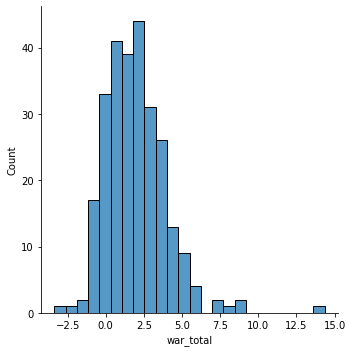

In [ ]:
ax=sns.displot(df['war_total'])

A majority of players have a wins above replacement score aournd 2.0. There is an outlier at 14.5

In [ ]:
#checking for wins above replacement above 4 
df=df[(df.war_total>=4)]

I want to take a look at players that make a big contribution.

In [ ]:
#all the rows with WAR above 4
df[['war_total']]

,war_total
7,5.178882
11,7.430412
64,4.607661
65,4.254306
78,4.006990
85,4.345227
110,5.472741
123,8.634417
131,4.955508
138,4.780573


In [ ]:
#checking WAR and player that corresponds with that row
df[['war_total','player_name']]

,war_total,player_name
7,5.178882,Jarrett Allen
11,7.430412,Giannis Antetokounmpo
64,4.607661,Mikal Bridges
65,4.254306,Miles Bridges
78,4.006990,Jalen Brunson
85,4.345227,Jimmy Butler
110,5.472741,Mike Conley
123,8.634417,Stephen Curry
131,4.955508,DeMar DeRozan
138,4.780573,Luka Doncic


Looking at this list it appears that players with a WAR at or above 4 are decent NBA players as a few of them have been All-Stars, All defensive players, all offensive players and rookie of the year candidates. I want to sort the column in ascending order. 

In [ ]:
df.sort_values(
    by=["war_total", "player_name"]
)[["war_total", "player_name"]]

,war_total,player_name
476,4.000605,D'Angelo Russell
78,4.006990,Jalen Brunson
332,4.040397,Kyle Lowry
374,4.121447,Donovan Mitchell
568,4.179750,Andrew Wiggins
539,4.182730,Jonas Valanciunas
65,4.254306,Miles Bridges
152,4.267903,Anthony Edwards
541,4.343975,Jarred Vanderbilt
85,4.345227,Jimmy Butler


This is interesting. According to win above replacement, Jokic is adding the most wins to his team, the Denver Nuggets. Does this mean that he should be mvp this year again? It might be given that his team is out with their number 2 and 3 options. 

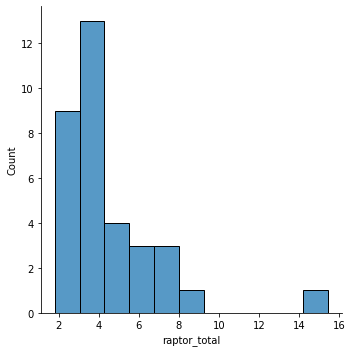

In [ ]:
#distribution of the raptor_total
ax=sns.displot(df['raptor_total'])

It looks like most players have a raptor amount between 3 and 5 with the mode being about 4. The raptor total also has an outlier here... could it be Jokic again? 

In [ ]:
df.sort_values(
    by=["raptor_total", "player_name"]
)[["raptor_total", "player_name"]]

,raptor_total,player_name
65,1.804413,Miles Bridges
78,2.075865,Jalen Brunson
64,2.361477,Mikal Bridges
152,2.412384,Anthony Edwards
568,2.648632,Andrew Wiggins
539,2.928753,Jonas Valanciunas
428,2.954008,Chris Paul
131,2.986243,DeMar DeRozan
332,3.005153,Kyle Lowry
497,3.071734,Marcus Smart


Looking at the RAPTOR total, Jokic is killing it. I'd like to see if the current data I have can tell me why, what specifically is causing him to perform well above everyone else? Is it his defense? Is it because the offense runs strictly through him since his team is injured plagued. His he really this phenomenal of a basketball player? 

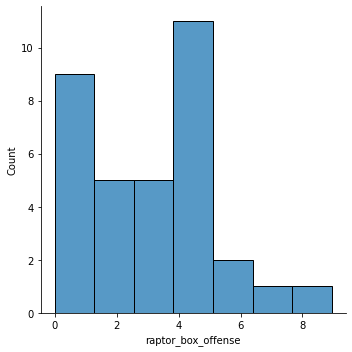

In [ ]:
ax=sns.displot(df['raptor_box_offense'])

The box_offense score is around the sae amount with most fo the data being between 0 and 4 with 4 being the most frequent. 

In [ ]:
df.sort_values(
    by=["raptor_offense", "player_name"]
)[["raptor_offense", "player_name"]]

,raptor_offense,player_name
568,0.614885,Andrew Wiggins
564,0.737781,Derrick White
539,0.777463,Jonas Valanciunas
7,0.781805,Jarrett Allen
187,0.966174,Rudy Gobert
64,1.168803,Mikal Bridges
497,1.179615,Marcus Smart
332,1.430016,Kyle Lowry
541,1.556745,Jarred Vanderbilt
65,2.083931,Miles Bridges


Jokic's offense makes up most of his total raptor score. Closley followed by Trae Young, Curry, and LeBron. 

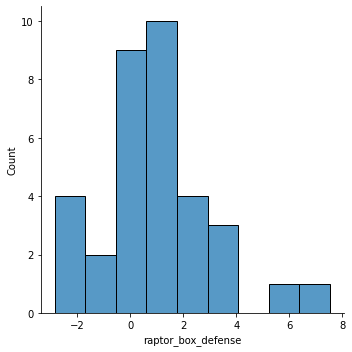

In [ ]:
ax=sns.displot(df['raptor_box_defense'])

It appears that playing defense seems much more difficult in the NBA as there are many great offensive players which can expalin why the box_defense score is lower with most of the data being between 0 and 2 with 1 being the most frequent. It could seem that while offense plays a large role in the game, if you can get players that can be in the upper echelon of defense betweeen 5-7 while still giving good offensive output that would be a phenomenal player to have. 

In [ ]:
df.sort_values(
    by=["raptor_box_defense", "player_name"]
)[["raptor_box_defense", "player_name"]]

,raptor_box_defense,player_name
587,-2.861529,Trae Young
131,-2.621404,DeMar DeRozan
374,-2.230052,Donovan Mitchell
428,-1.927067,Chris Paul
150,-1.078292,Kevin Durant
176,-0.976867,Darius Garland
381,-0.411432,Ja Morant
78,-0.318661,Jalen Brunson
476,-0.117986,D'Angelo Russell
123,-0.059873,Stephen Curry


Jokic is also doing well on the defensive side of the ball accoridng to his raptor score. His overall game is just that good. 

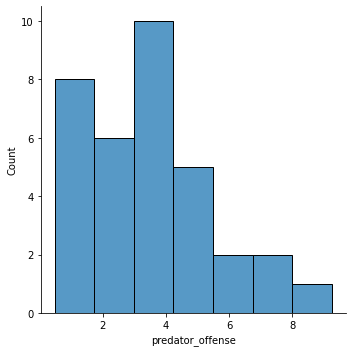

In [ ]:
ax=sns.displot(df['predator_offense'])

The predator offense is mainly around 4. 

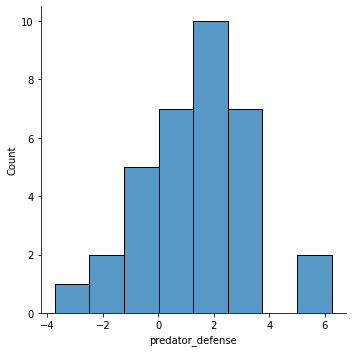

In [ ]:
ax=sns.displot(df['predator_defense'])

The predator defense is mainly around 2 with 6 being the outlier. 



**Bivariate Analysis**

I want to see how the other variables impact raptor total. 

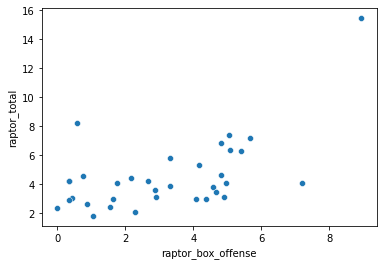

In [ ]:
sns.scatterplot(x='raptor_box_offense',y='raptor_total',data=df)

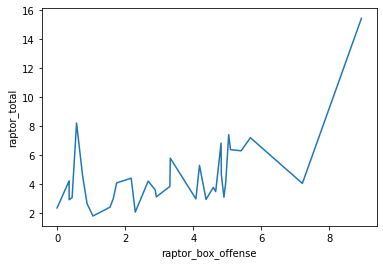

In [ ]:
sns.lineplot(x="raptor_box_offense", y="raptor_total",data=df)

Looking at the lineplot here, I observe something intersting around raptor_box_offense 7 where the raptor_total dips but then skyrockets once it hits 8 and above but overall like the scatterplot there is a positive relationship between the two variables. 

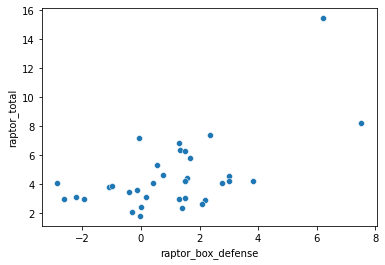

In [ ]:
sns.scatterplot(x='raptor_box_defense',y='raptor_total',data=df)

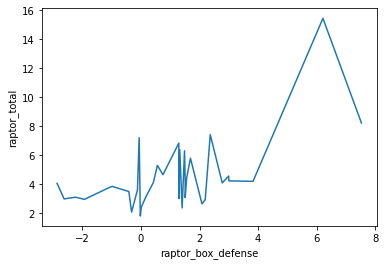

In [ ]:
sns.lineplot(x="raptor_box_defense", y="raptor_total",data=df)

There also seems here to be a positive defensive relationship with raptor score too. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


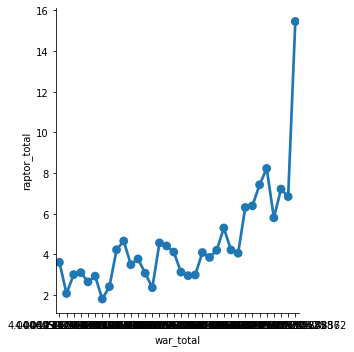

In [ ]:
sns.factorplot(x='war_total', y='raptor_total', data=df)

As the war_total increases so does the rapotor_total.

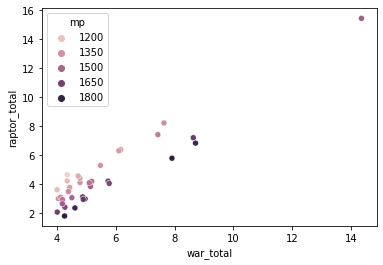

In [ ]:
sns.scatterplot(x="war_total", y="raptor_total", hue="mp", data=df);

I took a look at how war_total impacts raptor_total and it seems like there is a strong positive correlation. I also looked at the impact of mp played by players and that seems like it does not matter much as mp does not mean that the player is contributing much to the team.

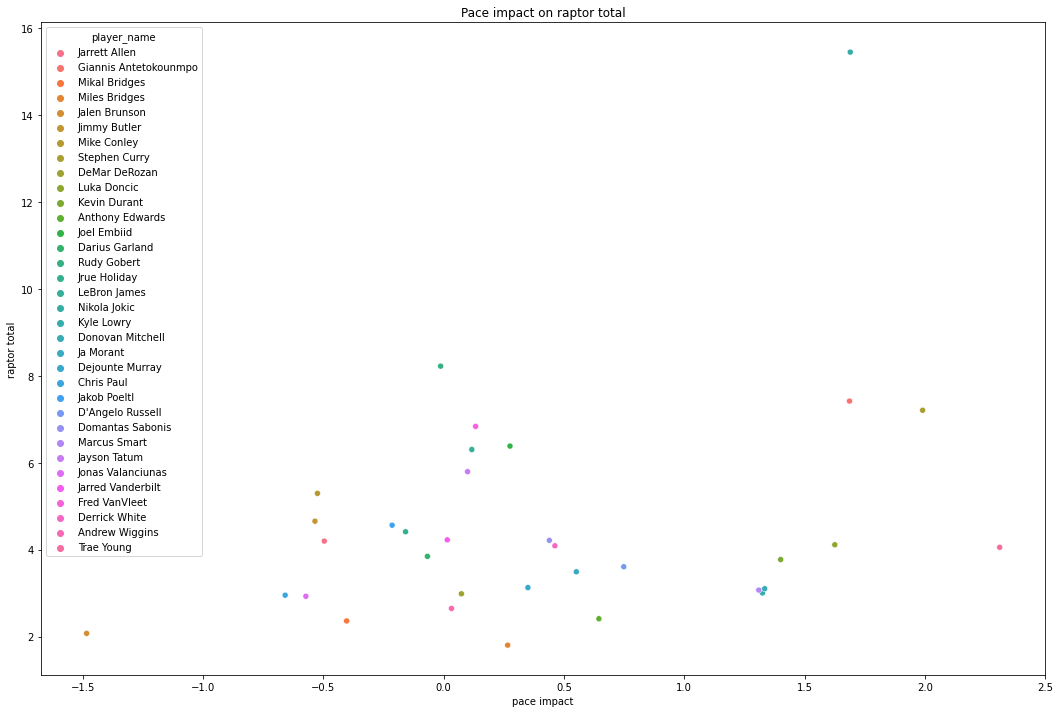

In [ ]:

plt.figure(figsize = (18,12))
sns.scatterplot(x="pace_impact", y="raptor_total", hue="player_name", data=df)
plt.xlabel('pace impact')
plt.ylabel('raptor total')
plt.title('Pace impact on raptor total')
plt.show()

I wanted to see if pace had a role on raptor total and looked at the players with higher raptor totals to do so. It seems like pace does not have an impact on raptor as there are players that play faster and have a higher raport and players that play slower that have a higher raptor. There is not really a relationship. 

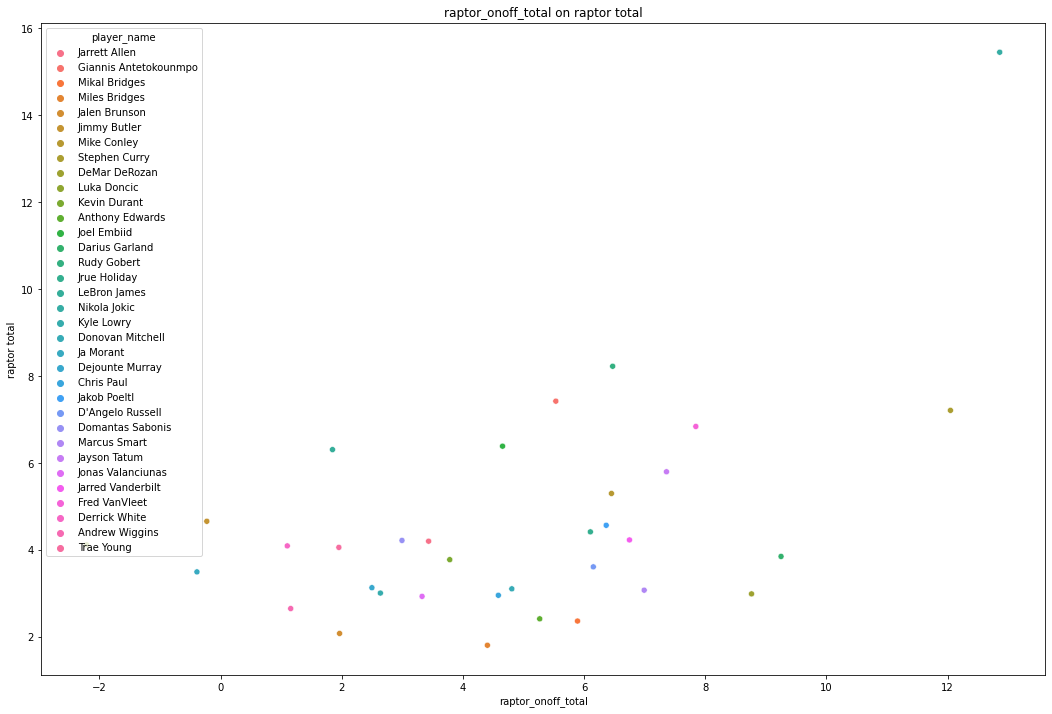

In [ ]:
plt.figure(figsize = (18,12))
sns.scatterplot(x="raptor_onoff_total", y="raptor_total", hue="player_name", data=df)
plt.xlabel('raptor_onoff_total')
plt.ylabel('raptor total')
plt.title('raptor_onoff_total on raptor total')
plt.show()

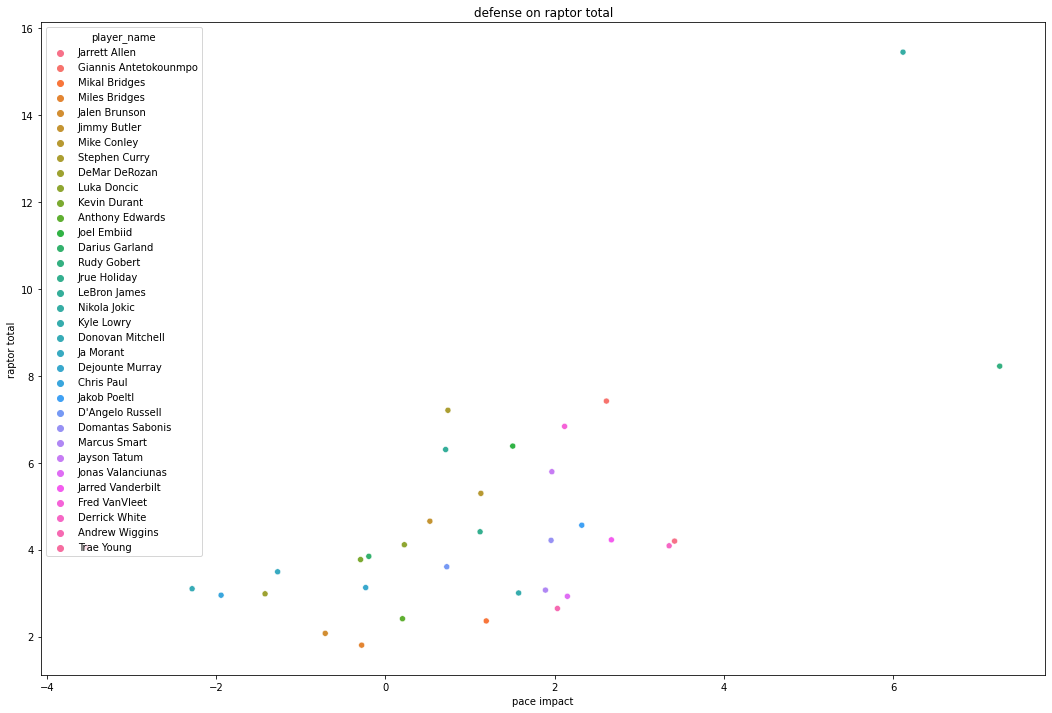

In [ ]:
plt.figure(figsize = (18,12))
sns.scatterplot(x="raptor_defense", y="raptor_total", hue="player_name", data=df)
plt.xlabel('pace impact')
plt.ylabel('raptor total')
plt.title('defense on raptor total')
plt.show()

In [ ]:
df.corr()

,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poss,NaN,1.000000,0.989553,-0.022580,-0.253228,-0.230118,0.285650,0.041553,0.282536,0.062493,-0.211408,-0.129026,0.197570,0.197570,NaN,0.077272,-0.190528,-0.092269,-0.010235
mp,NaN,0.989553,1.000000,-0.013194,-0.230441,-0.203268,0.261082,0.054446,0.271535,0.064499,-0.188701,-0.107962,0.222923,0.222923,NaN,0.069845,-0.162288,-0.075207,-0.054918
raptor_box_offense,NaN,-0.022580,-0.013194,1.000000,-0.282474,0.599621,0.223430,-0.071825,0.136730,0.960445,-0.265822,0.566521,0.568174,0.568174,NaN,0.918626,-0.273319,0.546946,0.500006
raptor_box_defense,NaN,-0.253228,-0.230441,-0.282474,1.000000,0.598315,-0.127146,0.371609,0.189326,-0.289454,0.970869,0.590498,0.479790,0.479790,NaN,-0.288429,0.935546,0.529591,-0.121810
raptor_box_total,NaN,-0.230118,-0.203268,0.599621,0.598315,1.000000,0.080554,0.250024,0.272154,0.560758,0.587921,0.965831,0.874853,0.874853,NaN,0.526683,0.552191,0.898668,0.316023
raptor_onoff_offense,NaN,0.285650,0.261082,0.223430,-0.127146,0.080554,1.000000,-0.292664,0.635220,0.485580,-0.187983,0.240624,0.315894,0.315894,NaN,0.470038,-0.152610,0.269327,0.058891
raptor_onoff_defense,NaN,0.041553,0.054446,-0.071825,0.371609,0.250024,-0.292664,1.000000,0.552608,-0.150509,0.582778,0.373661,0.398210,0.398210,NaN,-0.205445,0.552711,0.283406,0.093030
raptor_onoff_total,NaN,0.282536,0.271535,0.136730,0.189326,0.272154,0.635220,0.552608,1.000000,0.301668,0.306861,0.511533,0.596967,0.596967,NaN,0.243750,0.313406,0.463652,0.126469
raptor_offense,NaN,0.062493,0.064499,0.960445,-0.289454,0.560758,0.485580,-0.150509,0.301668,1.000000,-0.292565,0.576354,0.600086,0.600086,NaN,0.958295,-0.289112,0.567271,0.462866


Text(0.5, 1.0, 'correlation matrix (war_total)')

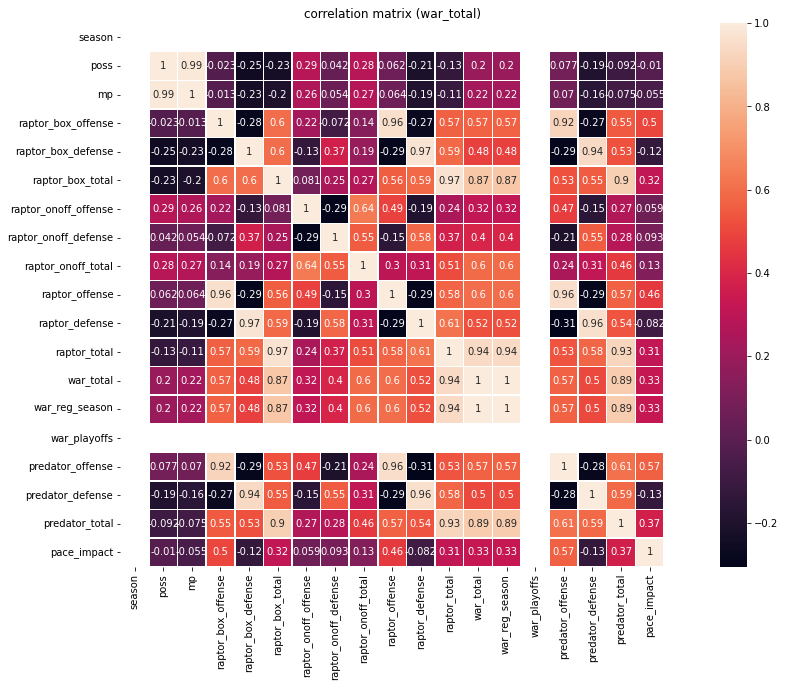

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
corrmat_df=df.corr()

plt.figure(figsize=(20,10))

# Draw the heat map using seaborn
sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (war_total)")


In [ ]:
# Get correlation matrix
corr= df.corr()['raptor_total'].reset_index()
corr=corr.sort_values([('raptor_total')],ascending=False)
corr

,index,raptor_total
11,raptor_total,1.000000
5,raptor_box_total,0.965831
12,war_total,0.941714
13,war_reg_season,0.941714
17,predator_total,0.926682
10,raptor_defense,0.612823
4,raptor_box_defense,0.590498
16,predator_defense,0.581554
9,raptor_offense,0.576354
3,raptor_box_offense,0.566521


In [ ]:
df.sort_values(
    by=["raptor_total", "player_name"]
)[["raptor_total", "player_name"]]

,raptor_total,player_name
65,1.804413,Miles Bridges
78,2.075865,Jalen Brunson
64,2.361477,Mikal Bridges
152,2.412384,Anthony Edwards
568,2.648632,Andrew Wiggins
539,2.928753,Jonas Valanciunas
428,2.954008,Chris Paul
131,2.986243,DeMar DeRozan
332,3.005153,Kyle Lowry
497,3.071734,Marcus Smart


**Conclusion and Discussion**

Accoridng to the raptor amount, players like Jokic, Gobert, Antetokounmpo, Curry, VanVleet, Embiid, Lebron, Tatum, Conley, and Butler contribute the most to their teams. So, if making the arguement of who impacts their teams most using those the players to mention. 

This was an analysis project but it will interesting to see what things would like if I scrapped basic stats such as ppg, rebounds, turnovers, etc. that would tell me a bit more about what influences raptor. It would also be intersting to use the predator metrics to predict maybe who should be mvp or who will contribute the most to their team next year, or who should be an all star. 